# Test tensorflow gpu #

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Dataset #

In [2]:
import os
import codecs

data = {}
classes_file = './TextData/classes.txt'
with codecs.open(classes_file, 'r', encoding='utf-8') as cF:
    data = cF.read().split('\r\n')
len(data)

94

In [3]:
import os
from PIL import Image, ImageDraw, ImageFont

text_source = './TextData/source.txt'
fonts_path = './TextData/Fonts'
fonts = [f'{fonts_path}/{f}' for f in os.listdir(fonts_path)]
fonts

['./TextData/Fonts/arial.ttf',
 './TextData/Fonts/arialbd.ttf',
 './TextData/Fonts/arialbi.ttf',
 './TextData/Fonts/ariali.ttf',
 './TextData/Fonts/calibri.ttf',
 './TextData/Fonts/calibrib.ttf',
 './TextData/Fonts/calibrii.ttf',
 './TextData/Fonts/calibriz.ttf',
 './TextData/Fonts/cambria.ttc',
 './TextData/Fonts/cambriab.ttf',
 './TextData/Fonts/cambriai.ttf',
 './TextData/Fonts/cambriaz.ttf',
 './TextData/Fonts/consola.ttf',
 './TextData/Fonts/consolab.ttf',
 './TextData/Fonts/consolai.ttf',
 './TextData/Fonts/consolaz.ttf',
 './TextData/Fonts/constan.ttf',
 './TextData/Fonts/constanb.ttf',
 './TextData/Fonts/constani.ttf',
 './TextData/Fonts/constanz.ttf',
 './TextData/Fonts/corbel.ttf',
 './TextData/Fonts/cour.ttf',
 './TextData/Fonts/courbd.ttf',
 './TextData/Fonts/courbi.ttf',
 './TextData/Fonts/couri.ttf',
 './TextData/Fonts/impact.ttf',
 './TextData/Fonts/Roboto-Black.ttf',
 './TextData/Fonts/Roboto-BlackItalic.ttf',
 './TextData/Fonts/Roboto-Bold.ttf',
 './TextData/Fonts/Robo

In [4]:
dataset = []
sequence_len = 20

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

def draw_img(img):
    plt.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)
    plt.show()

def load_img(img):
    return cv2.imread(img, cv2.IMREAD_GRAYSCALE)

def dilate_img(img):
    return cv2.dilate(img, np.ones((2,2), np.uint8))

def otsu_thresholding(img):
    norm_img = np.zeros(img.shape)
    img = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
    blur = cv2.GaussianBlur(img, (3,3), 0)
    _, img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img = dilate_img(img)
    return img

## Load dataset ##

In [6]:
with open(text_source) as txt:
    word_count = 0
    sequence = ''
    dataset = []
    for i, line in enumerate(txt):
        words = line.split(' ')
        for single_word in words:
            word = ''.join([c for c in single_word if c in data])
            
#             if word[-1:] == '\n':
#                 word = word[:-1]
            
            if len(word) < 1:
                continue
            
            if len(word) > 30:
                split_count = len(word) // 30 + 1
                for i in range(split_count):
                    start = i * split_count
                    end = start + len(word) // split_count
                    dataset.append(word[start:end])          
                continue
                
            sequence = sequence + word + ' ' * random.randrange(1, 4)
            word_count = (word_count + 1) % sequence_len
            if word_count == 0 or len(sequence) > 85:
                dataset.append(sequence[:-1])
                sequence = ''
                
dataset = list(set(dataset))
len(dataset)

67776

## Shuffle dataset ##

In [7]:
sorted_data = sorted(dataset, key=len)
longest_label = len(sorted_data[-1])
longest_label

110

In [8]:
import random

random.seed = 123456

random.shuffle(dataset)
# dataset = dataset[:3000]
dataset

['president  John  Witherspoon,   an Edinburgh theology graduate. University   of  Sydney: ',
 'husband  in   delaying   the Inheritor. Mary Jane is  heard   to  scream  off-panel as',
 'Queensland  and New  South   Wales.  The   wingspan   is',
 'Killer Croc.   In   2012,   Akinnuoye-Agbaje stated  that he   had been  developing a',
 'alternative pop:  "I   usually write  my   songs   on  a   guitar,  and they usually ',
 'villanus   is   a species   of  sea  snail, ',
 'the Murray  River to Port Phillip.Janet Templeton  ',
 'Operation  Linda   Nchi,  crossing the   border  into  Somalia   to  attack Al-Shabaab.',
 'a relief,  the   date  1766   and  the  names ',
 'production   of   these molecules  (GSK-3beta,   PP1,  and malin),  excessive  glycogen  ',
 "leads  to   D'Angelo  making  emotional gestures   as   he   lip-synchs   to   the  choral ",
 'calligrapher   Rikkat Kunt   and   her  second   husband  ',
 'of the 2002   album Let   Go  by Avril ',
 'Sauveur  Incorporated, a  C

# Split data #

In [9]:
train_split = int(0.9 * len(dataset))
val_split = int(train_split + 0.09 * len(dataset))
# test_split = int(train_split + 0.1 * len(dataset))

train_labels = dataset[:train_split]
val_labels = dataset[train_split:val_split]
test_labels = dataset[val_split:]

# val_labels = dataset[train_split:val_split]
# test_labels = dataset[val_split:]

print('Len train: ' + str(len(train_labels)))
print('Len val: ' + str(len(val_labels)))
print('Len test: ' + str(len(test_labels)))

Len train: 60998
Len val: 6099
Len test: 679


# Model #

In [10]:
timesteps = 256

width = 4096
height = 64

max_label_len = longest_label + 2
max_label_len

112

In [11]:
from tensorflow.keras import applications, backend as K
from tensorflow.keras import models, losses, optimizers, Model, utils
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Lambda, Reshape, Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Activation, add, concatenate

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

def build_model(num_classes=94, timesteps=256, max_label_len=max_label_len, input_shape=(4096, 64, 1), training=False):
    inputs = Input(name='the_inputs', shape=input_shape, dtype='float32')
    
    # Convolution layer (VGG)
    inner = Conv2D(32, (3, 3), padding='same', name='conv1-1', kernel_initializer='he_normal')(inputs)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(32, (3, 3), padding='same', name='conv1-2', kernel_initializer='he_normal')(inputs)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

    inner = Conv2D(64, (3, 3), padding='same', name='conv2-1', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(64, (3, 3), padding='same', name='conv2-2', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)

    inner = Conv2D(128, (3, 3), padding='same', name='conv3-1', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(128, (3, 3), padding='same', name='conv3-2', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(4, 2), name='max3')(inner)

    inner = Conv2D(256, (3, 3), padding='same', name='conv4-1', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(256, (3, 3), padding='same', name='conv4-2')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(1, 2), name='max4')(inner)

#     inner = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con5-1')(inner)
#     inner = BatchNormalization()(inner)
#     inner = Activation('relu')(inner)
#     inner = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con5-2')(inner)
#     inner = BatchNormalization()(inner)
#     inner = Activation('relu')(inner)

    # CNN to RNN
    inner = Reshape(target_shape=((timesteps, 1024)), name='reshape')(inner)
    inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)
    inner = Dropout(0.2)(inner)

    # RNN
    lstm1 = Bidirectional(LSTM(256, return_sequences=True, kernel_initializer='he_normal', 
                               name='lstm1'))(inner)
    lstm2 = Bidirectional(LSTM(512, return_sequences=True, kernel_initializer='he_normal', 
                               name='lstm2'))(lstm1)
    rnn = Dropout(0.2)(lstm2)
    
    # RNN output -> character activations:
    outer = Dense(num_classes + 1, kernel_initializer='he_normal', name='dense2')(rnn)
    y_pred = Activation('softmax', name='softmax')(outer)

    labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
    input_length = Input(name='input_length', shape=[1], dtype='int64')
    label_length = Input(name='label_length', shape=[1], dtype='int64')

    # Keras doesn't currently support loss funcs with extra parameters
    # so CTC loss is implemented in a lambda layer
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length]) #(None, 1)
    
    y_func = K.function([inputs], [y_pred])
    if training:
        return Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out), y_func
    else:
        return Model(inputs=[inputs], outputs=y_pred)

In [12]:
model, y_func = build_model(timesteps=timesteps, max_label_len=max_label_len, training=True)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_inputs (InputLayer)         [(None, 4096, 64, 1) 0                                            
__________________________________________________________________________________________________
conv1-2 (Conv2D)                (None, 4096, 64, 32) 320         the_inputs[0][0]                 
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 4096, 64, 32) 128         conv1-2[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 4096, 64, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

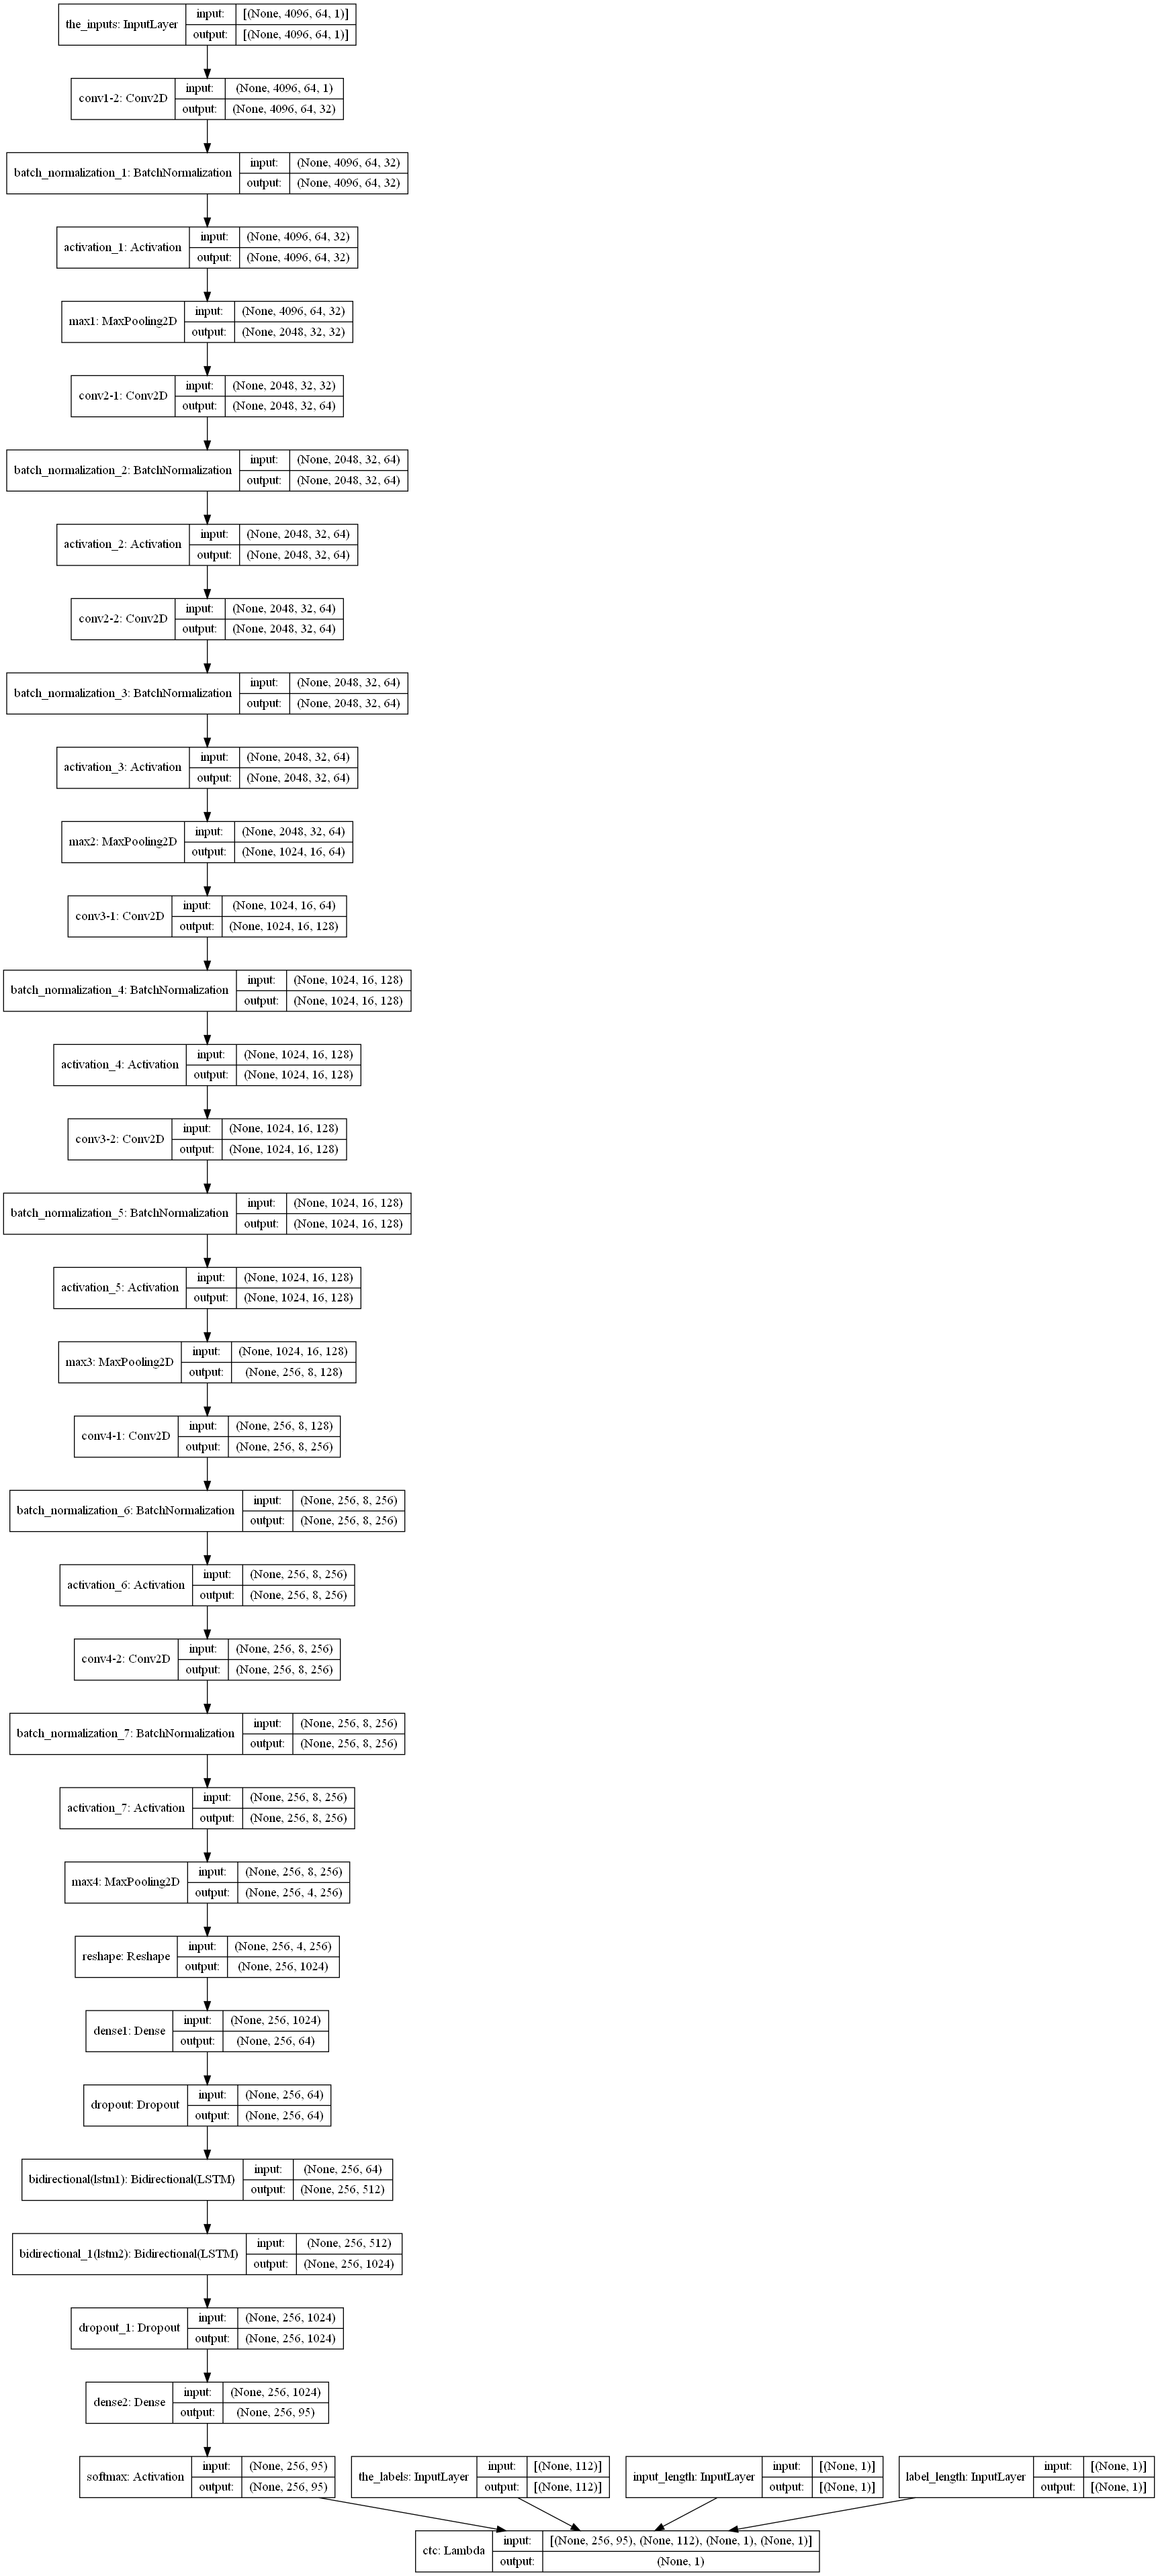

In [13]:
from tensorflow.keras.utils import plot_model
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

plot_model(model=model, show_shapes=True)

# Data generator #

In [14]:
import itertools

def return_classes(string):
    text = [' '] + list(string) + [' ']
    classes = [data.index(x) if x in data else 1 for x in text]
    return np.asarray(classes)

def return_text(classes):
    text = ''
    for c in classes:
        if 0 <= c < len(data) and c != 1:
            text += data[c]
    return text

def decode_batch(out, callback=False):
    ret = []
    for i in range(out.shape[0]):
        out_best = list(np.argmax(out[i, 2:], 1))
        out_best2 = [k for k, g in itertools.groupby(out_best)]
        outstr = return_text(out_best2)
        if callback:
            print(f'{out_best} -> {outstr}')
        ret.append(outstr)
    return ret

def gen_text_image(text, padding=16):
    font = random.choice(fonts)
    font_size = random.randrange(30, 61)
    fnt = ImageFont.truetype(font, font_size)
    width, _ = fnt.getsize(text)
    img = Image.new('L', (width + (padding + 1) * 2, 64), color=255)
    d = ImageDraw.Draw(img)

    if 'calibri' in font:
        d.text((padding + 2,2), text, font=fnt, fill=0)
    elif 'verdana' in font:
        d.text((padding + 2,-8), text, font=fnt, fill=0)
    elif 'constan' in font:
        d.text((padding + 2,0), text, font=fnt, fill=0)
    elif 'corbel' in font:
        d.text((padding + 2,2), text, font=fnt, fill=0)
    elif 'consola' in font:
        d.text((padding + 2,2), text, font=fnt, fill=0)
    elif 'cour' in font:
        d.text((padding + 2,-4), text, font=fnt, fill=0)
    elif 'tahoma' in font:
        d.text((padding + 2,-8), text, font=fnt, fill=0)
    else:
        d.text((padding + 2,-6), text, font=fnt, fill=0)
        
    image = np.array(img)
    image = add_salt_and_pepper(image, 0.2)
    image = otsu_thresholding(image)
    image = inverse(image)
    image = (image / 255.) * 2. - 1.
    return image

def inverse(image):
    return cv2.bitwise_not(image)

def add_salt_and_pepper(image, amount):
    output = np.copy(np.array(image))
    # add salt
    nb_salt = np.ceil(amount * output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_salt)) for i in output.shape]
    output[coords] = random.randint(50,200)

    # add pepper
    nb_pepper = np.ceil(amount * output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_pepper)) for i in output.shape]
    output[coords] = random.randint(0,100)
    return np.asarray(Image.fromarray(output))

In [15]:
class TextImageGenerator:
    def __init__(self, labels, img_w=4096, img_h=64,
                 batch_size=64, timesteps=500, training=True, max_text_len=max_label_len):
        self.dim = (img_w, img_h, 1)
        self.batch_size = batch_size
        self.max_text_len = max_text_len
        self.labels = labels
        self.n = len(self.labels)
        self.indexes = list(range(self.n))
        self.training = training
        self.cur_index = 0
        
    def next_sample(self):
        self.cur_index += 1
        if self.cur_index >= self.n:
            self.cur_index = 0
            random.shuffle(self.indexes)
        return self.labels[self.indexes[self.cur_index]]
            
    
    def next_batch(self):
        while True:
            X = np.zeros((self.batch_size, *self.dim))
            y = np.zeros((self.batch_size, self.max_text_len), dtype=int)
            input_length = np.full((self.batch_size, 1), timesteps, dtype=np.float32)
            label_length = np.zeros((self.batch_size, 1), dtype=np.float32)
            
            for i in range(self.batch_size):
                label = self.next_sample()
                # Store sample
                image = np.swapaxes(gen_text_image(label), 0, 1)
                image = np.expand_dims(image, -1)
                X[i, 0:image.shape[0], :] = image

                # Store class
                label_classes = return_classes(label)
                y[i, :len(label_classes)] = label_classes
                label_length[i] = len(label_classes)

            inputs = {
                'the_inputs': X,  # (bs, 2000, 64, 1)
                'the_labels': y,  # (bs, 51)
                'input_length': input_length,  # (bs, 1)
                'label_length': label_length  # (bs, 1)
            }
            outputs = {'ctc': np.zeros([self.batch_size])}   # (bs, 1)
            yield (inputs, outputs)

# Callbacks #

In [16]:
import editdistance
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, Callback

class VizCallback(Callback):
    def __init__(self, y_func, text_img_gen, text_size, num_display_words=10):
        self.y_func = y_func
        self.text_img_gen = text_img_gen
        self.num_display_words = num_display_words
        self.text_size = text_size

    def show_edit_distance(self, num):
        num_left = num
        mean_norm_ed = 0.0
        mean_ed = 0.0
        while num_left > 0:
            word_batch = next(self.text_img_gen.next_batch())[0]
            num_proc = min(word_batch['the_inputs'].shape[0], num_left)
            # predict
            inputs = word_batch['the_inputs'][0:num_proc]
            pred = self.y_func([inputs])[0]
            decoded_res = decode_batch(pred)
            # label
            labels = word_batch['the_labels'][:num_proc].astype(np.int32)
            labels = [return_text(label) for label in labels]
            
            for j in range(num_proc):
                edit_dist = editdistance.eval(decoded_res[j], labels[j])
                mean_ed += float(edit_dist)
                mean_norm_ed += float(edit_dist) / len(labels[j])

            num_left -= num_proc
        mean_norm_ed = mean_norm_ed / num
        mean_ed = mean_ed / num
        print('\nOut of %d samples: \nMean edit distance:'
              '%.3f \nMean normalized edit distance: %0.3f \n'
              % (num, mean_ed, mean_norm_ed))

    def on_epoch_end(self, epoch, logs={}):
        batch = next(self.text_img_gen.next_batch())[0]
        inputs = batch['the_inputs'][:self.num_display_words]
        labels = batch['the_labels'][:self.num_display_words].astype(np.int32)
        labels = [return_text(label) for label in labels]
         
        pred = self.y_func([inputs])[0]
        pred_texts = decode_batch(pred)
        
        for i in range(min(self.num_display_words, len(inputs))):
            print("label: {} - predict: {}".format(labels[i], pred_texts[i]))

        self.show_edit_distance(self.text_size)

In [17]:
batch_size = 16
train_generator = TextImageGenerator(train_labels, training=True, batch_size=batch_size)
val_generator = TextImageGenerator(val_labels, training=False, batch_size=batch_size)
test_generator = TextImageGenerator(test_labels, training=False, batch_size=batch_size)

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
output_dir = './models/VGG'
weight_path = f'{output_dir}/ocr_model_{datetime.now().strftime("%Y%m%d-%H%M%S")}' + '_epoch_{epoch:02d}.h5'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

tensorboard = TensorBoard(log_dir=log_dir)
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
vis = VizCallback(y_func, test_generator, len(test_labels))
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='min')

initial_learning_rate = 0.001
epochs = 100

callbacks = [early_stop, tensorboard, vis, checkpoint]
# callbacks = [early_stop, tensorboard, vis, LearningRateScheduler(lr_time_based_decay, verbose=1)]

# Training #

In [18]:
def train(callbacks, batch_size, epochs, initial_epoch=0):
    print('Training process starting...')
    H = model.fit(train_generator.next_batch(),
                  steps_per_epoch=train_len//batch_size,
                  validation_data=val_generator.next_batch(),
                  validation_steps=val_len//batch_size,
                  epochs=epochs, 
                  initial_epoch=initial_epoch,
                  callbacks=callbacks,
                  verbose=1)
    return H

In [19]:
train_len = len(train_labels)
val_len = len(val_labels)

In [20]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=initial_learning_rate)

In [21]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer='adam')

train(callbacks, batch_size, epochs)

Training process starting...


<ipython-input-14-ed1a10243b71>:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = random.randint(50,200)
<ipython-input-14-ed1a10243b71>:71: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = random.randint(0,100)


Epoch 1/100
3812/3812 [==============================] - 1602s 416ms/step - loss: 141.2410 - val_loss: 88.9003
label:  Rural   telephone   exchange, incorporating 1940s equipment from   Coolham   Arundel                            - predict: Rural   telephone   exchange, incorgorating 1940sequipnent fron   Coolhan   Arundel  
label:  is 1.8   kilometres long.   On   average it  has                                                                - predict: s 18   kiomeies Iong   On   vaeat  has  
label:  Barrow-in-Furness   Borough                                                                                     - predict: Barrox-in-(irness   Joroush  
label:  Abreu   appeared   in  22 games  with  KC,   batting .257.On   January   25, 2013  the                          - predict: ubrc,   pare   i        
label:  bases.  Human Rights Watch documented  cases in a  71 page   report published  on  8 September                  - predict: bases. Huan Rights Watch documented  casesin a 71pag


Out of 679 samples: 
Mean edit distance:52.330 
Mean normalized edit distance: 0.467 


Epoch 00004: val_loss improved from 70.00296 to 61.14492, saving model to ./models/VGG\ocr_model_20210923-080913_epoch_04.h5
Epoch 5/100
3812/3812 [==============================] - 1575s 413ms/step - loss: 90.1750 - val_loss: 63.8959
label:  X  Healthy People  program  Legal   challenges   to the   Patient                                               - predict: X HeatyPepe  proram  Lea   l eges o  
label:  March   1940.In   April  1940,   during Operation Weserbung,                                                    - predict: arch  1901n   Ari  190,   during  Operaion Weserbung,   
label:  telecommunications  for environmental sustainability. In  2007   the Telecommunications                         - predict: elecommunications for environmental sustainabity.In  2007  the elecommunications  
label:  refers to   the historical   relationship   between  the  Republic   of  the Gambia and          


Out of 679 samples: 
Mean edit distance:56.750 
Mean normalized edit distance: 0.507 


Epoch 00008: val_loss did not improve from 59.87203
Epoch 9/100
3812/3812 [==============================] - 1652s 433ms/step - loss: 71.4874 - val_loss: 78.5633
label:  like her   father Crown   Prince Haakon   did  22                                                               - predict: ie  be        
label:  pop   producer  Benny Blanco. After a five-year   contract struggle   with his  label                           - predict: op   produear  Beanay Baneo. Aftera Fivear   contr trgug   whhihi l  
label:  to  the   Grand Prix,   Prix   d'Interpretation,   Grand  Prix Chries   du   film documentaire,                 - predict: o  the   Grandpr   r    p pinn    Baer, 
label:  Book   of   the  Year   Award: Older                                                                            - predict: Boo  of   the  Vear    A war. Oe   
label:  Most   UFOs are  identified or investigated as conventi


Out of 679 samples: 
Mean edit distance:54.334 
Mean normalized edit distance: 0.485 


Epoch 00012: val_loss did not improve from 56.09261
Epoch 13/100
3812/3812 [==============================] - 1651s 433ms/step - loss: 71.0103 - val_loss: 63.1246
label:  War.   Melbourne,  Victoria: Echo   Books. ISBN   978-0-6485540-8-0.   Hatwell,                                 - predict: ar.   ehboure, itari. ho    Bo   ed 
label:  He  considered   becoming   a   doctor  but  he  enjoyed   music                                                - predict: e  coniderd   beong      t   boute e   in  
label:  first WCC title in 1984,   when   the                                                                           - predict: irst MC tite in 194,   when   the  
label:  River, Mississippi   River,  and   Ohio   River.   ARTCO   Stevedoring                                          - predict: iver, Mssssippi   River,  and   Ohio   River.   AICO   Sstevedoring   
label:  that  the title  Sam  &  Max


Out of 679 samples: 
Mean edit distance:57.311 
Mean normalized edit distance: 0.512 


Epoch 00016: val_loss did not improve from 56.09261


# Testing #